In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

First, count the latent code usage for both top and bottom codemaps

In [8]:
top_count, bottom_count = [0] * 512, [0] * 512

root_dir = "/Users/llewyn/Documents/data/stft/codes"

for file in os.listdir(root_dir):
    file = np.load(os.path.join(root_dir, file), allow_pickle=True)
    
    top, bot = file[0], file[1]
    for i in top.flatten():
        top_count[i] += 1
    
    for j in bot.flatten():
        bottom_count[j] += 1
    

In [16]:
len([b for b in bottom_count if b < 50])

327

In [17]:
max(bottom_count)

600142812

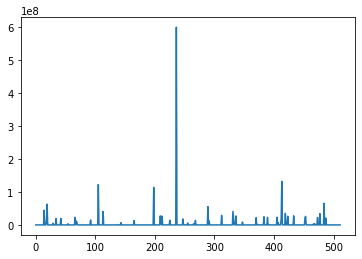

In [12]:
plt.plot(range(512), bottom_count)

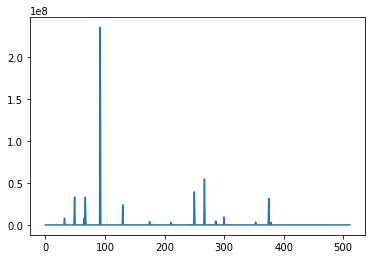

In [13]:
plt.plot(range(512), top_count)

In [80]:
import tensorflow as tf

w_init = tf.random_uniform_initializer()
embeddings = tf.Variable(
    initial_value=w_init(
        shape=(128, 128), dtype="float32"
    )
)
flattened_inputs = tf.Variable(
    initial_value=w_init(
        shape=(128 * 11, 128), dtype="float32"
    )
)
similarity = tf.matmul(flattened_inputs, embeddings)

In [24]:
distances = (
            tf.reduce_sum(flattened_inputs ** 2, axis=1, keepdims=True)
            + tf.reduce_sum(embeddings ** 2, axis=0)
            - 2 * similarity
        )

In [64]:
encoding_indices = tf.argmin(distances, axis=1)

In [128]:
embeddings_count = tf.Variable([0] * 128, shape=(128, ))
num_iterations = tf.Variable(1, name='num_iterations', trainable=False, dtype=tf.int32)
reset_threshold = tf.Variable(1 / 128, name='threshold', trainable=False, dtype=tf.double)

In [139]:
num_iterations.assign_add(flattened_inputs.shape[0])
for index in tf.unstack(encoding_indices):
    embeddings_count[index].assign(embeddings_count[index] + 1)
    if embeddings_count[index] / num_iterations < reset_threshold:
        rand_index = tf.random.uniform(shape=[], minval=0, maxval=128, dtype=tf.int64)
        embeddings = update_columns(embeddings, index, flattened_inputs[rand_index])


<tf.Variable 'Variable:0' shape=(128,) dtype=int32, numpy=
array([ 88, 172,   4,  16,  16,  32,  64,  52,  24,  32,  64,   0,  44,
         0,  68,  28,   4,  72,  16,  44,  64,  60,   8,   8,  72, 100,
         8,   0, 100,  48,  68,  72,   8,  28, 128,  24,  20,  84,  12,
       112,   4,  88,   0,  40,  24,  36,  56,  32, 144,  44,  60,  12,
         4,   0,  68,  12,  96,   4,  12,  16,  16, 276,   4,  96,  40,
        24,   8,  40,   8,  16,  48,   4,  56,   4,  16,  32,  28,  12,
         8,  28,  52,  12,  28,  52, 104, 384,   8,  24,  56,   8,  68,
        56,   4,   8,  36,  16, 220,   4,  36,  60,   8,   8,  40,  60,
        16,   0,  12,  16,   8, 252,   0,   0,   4,  16,   4,  12,  16,
        92,  68,  32,   4,  32,  96,  56,  48,  28,   0,  88], dtype=int32)>

In [113]:
def update_columns(variable, columns, updates):
    value = tf.expand_dims(updates,1)
    columns = tf.convert_to_tensor(columns)
    rows = tf.range(tf.shape(variable)[0], dtype=columns.dtype)
    ii, jj = tf.meshgrid(rows, columns, indexing='ij')
    value = tf.broadcast_to(value, tf.shape(ii))
    return tf.tensor_scatter_nd_update(variable, tf.stack([ii, jj], axis=-1), value)

In [116]:
random_update_count

1197

In [120]:
tf.random.uniform(shape=[], minval=0, maxval=128, dtype=tf.int64)


<tf.Tensor: shape=(), dtype=int64, numpy=41>

In [123]:
embeddings_count = tf.Variable([0] * 128, shape=(128, ))

In [138]:
embeddings_count

<tf.Variable 'Variable:0' shape=(128,) dtype=int32, numpy=
array([ 66, 129,   3,  12,  12,  24,  48,  39,  18,  24,  48,   0,  33,
         0,  51,  21,   3,  54,  12,  33,  48,  45,   6,   6,  54,  75,
         6,   0,  75,  36,  51,  54,   6,  21,  96,  18,  15,  63,   9,
        84,   3,  66,   0,  30,  18,  27,  42,  24, 108,  33,  45,   9,
         3,   0,  51,   9,  72,   3,   9,  12,  12, 207,   3,  72,  30,
        18,   6,  30,   6,  12,  36,   3,  42,   3,  12,  24,  21,   9,
         6,  21,  39,   9,  21,  39,  78, 288,   6,  18,  42,   6,  51,
        42,   3,   6,  27,  12, 165,   3,  27,  45,   6,   6,  30,  45,
        12,   0,   9,  12,   6, 189,   0,   0,   3,  12,   3,   9,  12,
        69,  51,  24,   3,  24,  72,  42,  36,  21,   0,  66], dtype=int32)>

In [132]:
num_iterations

<tf.Variable 'num_iterations:0' shape=() dtype=int32, numpy=1409>

In [141]:
129/1409

0.09155429382540808